## Canvas Data:

CSV with tuples <time, user, x_coordinate, y_coordinate, color>

More info: https://www.reddit.com/r/redditdata/comments/6640ru/place_datasets_april_fools_2017/

Download: https://www.kaggle.com/residentmario/reddit-rplace-history/version/1

Save the data: "../data/tile_placemnets.csv"

In [7]:
#import basic libraries

import csv
import sys
import os
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import sparse
from scipy import linalg
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import axes3d
%matplotlib tk
import operator

In [1]:
# One needs to sort the data according to the time
# Please keep the header as it is; the following command will help to sort.
# We will use the sorted_tile_placements.csv

!awk 'NR == 1; NR > 1 {print $0 | "sort -t, -nk1,1"}' ../data/tile_placements.csv > ../data/sorted_tile_placements.csv

In [8]:
# opencv needs to be installed
sys.path.append("../Python_code") # go to parent dir
from analytics_combined import *
from denoise_canvas import *
from canvas_vis import *


<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

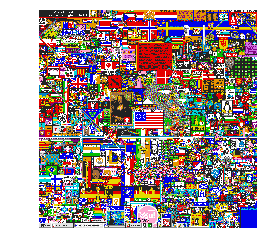

In [5]:
#Version of the canvas denoised by users (A supervised method to denoise the data)
den_data = cv2.imread('../data/2 - DiaqKoA.png')

#Converting bgr to rgb
b,g,r = cv2.split(den_data) 
rgb_data = cv2.merge([r,g,b])

#Drawing de-noised canvas
draw_canvas(rgb_data, "../plots/den_canvas_users.svg")

#Converting denoised canvas to canvas code
den_data_color_code = canvas_rgb_color_code(rgb_data)

#Adding denoised version of the canvas as updates to the file
write_denoised_data("../data/sorted_tile_placements.csv", den_data_color_code,
                    "../data/sorted_tile_placements_denoised_users.csv")

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

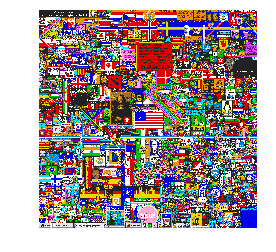

In [5]:
#Version of the canvas denoised by taking aggregation of neighbouring windows (An unsupervised method to denoise the data)


#Reading original canvas
data = extract_canvas_color('../data/sorted_tile_placements.csv')
rgb_data = canvas_color_code_rgb(data)

#Denoise canvas by replacing pixel to the most frequent in a sliding 
#window whenever that color happens only once in the window (size 3)
den_data = denoise_freq(rgb_data)

#Drawing de-noised canvas
draw_canvas(den_data, "../plots/den_canvas_freq.svg")

#Converting denoised canvas to canvas code
den_data_color_code = canvas_rgb_color_code(den_data)

#Adding denoised version of the canvas as updates to the file
write_denoised_data("../data/sorted_tile_placements.csv", den_data_color_code,
                    "../data/sorted_tile_placements_denoised_freq.csv")

In [9]:

# Parse the json file, store the Path objects of every image within the canvas, and return as a dictionary indexed by the picture id.
locations = store_locations("../data/atlas_filtered.json")

# Takes the tile_placements and atlas data and creates a csv where each line is a tuple of the following elements:
# time, user, x, y, color, project_id, pixel (binary), pixel_color (binary)
# pixel denotes whether it is in the final project
# pixel_color denotes whether the update has the same color as the final one or not
add_atlas_data_to_tile_placements(locations, "../data/sorted_tile_placements.csv", "../data/sorted_tile_placements_proj.csv")


# Denoised version of the previous file using Frequent Pixel heuristic
add_atlas_data_to_tile_placements(locations, "../data/sorted_tile_placements_denoised_freq.csv","../data/sorted_tile_placements_proj_den_freq.csv")

#Denoised version of same file based on figure created by users
add_atlas_data_to_tile_placements(locations, "../data/sorted_tile_placements_denoised_users.csv","../data/sorted_tile_placements_proj_den_users.csv")
